# Single label

In [1222]:
import numpy as np

In [1223]:
import pandas as pd

base_path = "/Users/paulkaufmann/Documents/Dokumente/Office Dokumente/Uni Zeugs/Master/"
base_path += "CV4RS PJ/Code/CV4RS/2_metric-learning-divide-and-conquer/data_splits/MLRSNet/"

<AxesSubplot:>

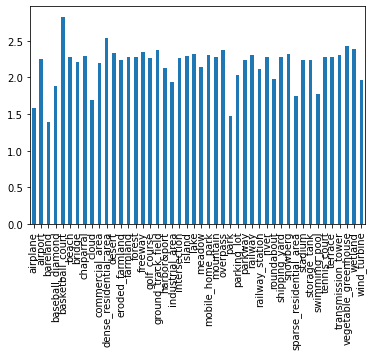

In [1224]:
data = pd.read_csv(base_path+"train.csv", sep=",", names=["path"]+["l%i"%x for x in range(60)])
data.path = data.path.apply(lambda x: x.split("/")[2])

train_value_counts = data.apply(pd.value_counts).path
train_value_counts = train_value_counts[~train_value_counts.isna()]
train_value_counts = train_value_counts / sum(train_value_counts) * 100

train_value_counts.plot(kind='bar')

<AxesSubplot:>

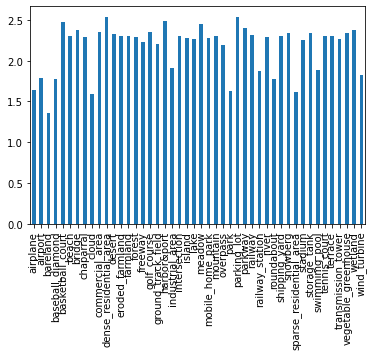

In [1225]:
data = pd.read_csv(base_path+"test.csv", sep=",", names=["path"]+["l%i"%x for x in range(60)])
data.path = data.path.apply(lambda x: x.split("/")[2])

test_value_counts = data.apply(pd.value_counts).path
test_value_counts = test_value_counts[~test_value_counts.isna()]
test_value_counts = test_value_counts / sum(test_value_counts) * 100

test_value_counts.plot(kind='bar')

<AxesSubplot:>

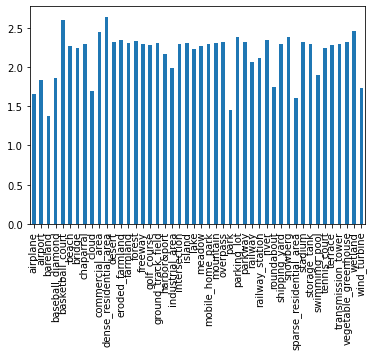

In [1226]:
data = pd.read_csv(base_path+"val.csv", sep=",", names=["path"]+["l%i"%x for x in range(60)])
data.path = data.path.apply(lambda x: x.split("/")[2])

eval_value_counts = data.apply(pd.value_counts).path
eval_value_counts = eval_value_counts[~eval_value_counts.isna()]
eval_value_counts = eval_value_counts / sum(eval_value_counts) * 100

eval_value_counts.plot(kind='bar')

In [1227]:
d = pd.DataFrame({'train':train_value_counts, 'test':test_value_counts, 'eval':eval_value_counts})

In [1228]:
d["std"] = d.apply(lambda row:np.array(row).std(), axis=1)

In [1229]:
d.sort_values("std", ascending=False)

,train,test,eval,std
parking_lot,2.028922,2.540126,2.383863,0.213888
airport,2.251242,1.789220,1.843928,0.206118
harbor&port,2.127063,2.489526,2.169927,0.161713
basketball_court,2.832078,2.479406,2.607987,0.145727
meadow,2.141083,2.449046,2.271801,0.126203
railway_station,2.113043,1.870180,2.118989,0.115914
railway,2.311328,2.313437,2.068052,0.115182
commercial_area,2.201170,2.347845,2.455175,0.104111
roundabout,1.980852,1.779100,1.752241,0.102029
wind_turbine,1.960824,1.823628,1.731866,0.094083


In [1230]:
d["std"].mean()

0.05814911052891508

In [ ]:
0.28270471169931877

# Multi label distribution

In [1216]:
def make_str(row):
    return row[0] + "_" + "".join([str(x) for x in row[1:]])

data = pd.read_csv(base_path+"train.csv", sep=",", names=["path"]+["l%i"%x for x in range(60)])
data.path = data.path.apply(lambda x: x.split("/")[2])

train_value_counts_ml = data.apply(lambda row: make_str(row), axis=1).to_frame()
train_value_counts_ml = train_value_counts_ml.apply(pd.value_counts)[train_value_counts_ml.columns[0]]
train_value_counts_ml = train_value_counts_ml[~train_value_counts_ml.isna()]
train_value_counts_ml = train_value_counts_ml / sum(train_value_counts_ml) * 100

In [1217]:
data = pd.read_csv(base_path+"test.csv", sep=",", names=["path"]+["l%i"%x for x in range(60)])
data.path = data.path.apply(lambda x: x.split("/")[2])

test_value_counts_ml = data.apply(lambda row: make_str(row), axis=1).to_frame()
test_value_counts_ml = test_value_counts_ml.apply(pd.value_counts)[test_value_counts_ml.columns[0]]
test_value_counts_ml = test_value_counts_ml[~test_value_counts_ml.isna()]
test_value_counts_ml = test_value_counts_ml / sum(test_value_counts_ml) * 100

In [1218]:
data = pd.read_csv(base_path+"val.csv", sep=",", names=["path"]+["l%i"%x for x in range(60)])
data.path = data.path.apply(lambda x: x.split("/")[2])

eval_value_counts_ml = data.apply(lambda row: make_str(row), axis=1).to_frame()
eval_value_counts_ml = eval_value_counts_ml.apply(pd.value_counts)[eval_value_counts_ml.columns[0]]
eval_value_counts_ml = eval_value_counts_ml[~eval_value_counts_ml.isna()]
eval_value_counts_ml = eval_value_counts_ml / sum(eval_value_counts_ml) * 100

In [1219]:
d2 = pd.DataFrame({'train':train_value_counts_ml, 'test':test_value_counts_ml, 'eval':eval_value_counts_ml})
d2["std"] = d2.apply(lambda row:np.array(row).std(), axis=1).to_frame()

In [1220]:
todo = d2[~d2["std"].isna()].sort_values("std", ascending=False).head(20).index.values.tolist()
d2[~d2["std"].isna()].sort_values("std", ascending=False).head(20)

,train,test,eval,std
ground_track_field_001000010000000000100010000000000001000100000000000001001000,0.216311,0.224665,0.244499,0.011821
eroded_farmland_000000000000000001000000100000000000000000000000000000001000,0.206297,0.214544,0.234311,0.011755
vegetable_greenhouse_000000010000000001000001000000000001000100000000000000000000,0.018026,0.014168,0.040750,0.011728
harbor&port_000000010000000100000010010000000001000100001000010000000100,0.002003,0.018216,0.030562,0.011695
airport_011000010000000000000010000000000001000001000000000000001000,0.216311,0.234785,0.244499,0.011691
swimmimg_pool_000000010000000000000010000000000001000000000000010000001100,0.686989,0.690186,0.713121,0.011639
mountain_000000000000000000000010000000100000000000000100000000001000,0.779122,0.781266,0.804808,0.011636
wetland_000000000000000000000000000000000000000000000000000000000110,0.931341,0.935090,0.957620,0.011606
stadium_001000010000000000000010000000000001000000000000100000001000,0.006009,0.006072,0.030562,0.011560
stadium_000000011000000000100010000000000001000000000000100000001000,0.006009,0.006072,0.030562,0.011560


In [1197]:
ys_old = d2[~d2["std"].isna()].sort_values("std", ascending=False)["std"].values

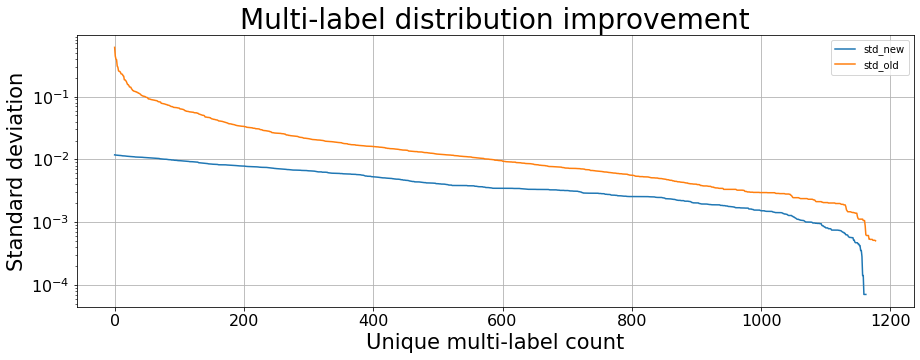

In [1213]:
tmp = pd.DataFrame(data=[ys, ys_old]).T
tmp.columns = ["std_new", "std_old"]
ax = tmp.plot.line(figsize=(15,5), grid=True, logy=True, fontsize=16)
ax.set_ylabel("Standard deviation", fontsize=21);
ax.set_xlabel("Unique multi-label count", fontsize=21);
ax.set_title("Multi-label distribution improvement", fontsize=28);

<AxesSubplot:>

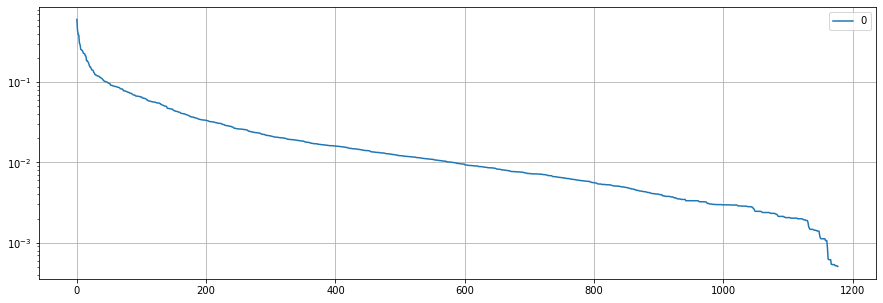

In [1183]:
pd.DataFrame(data=[ys]).T.plot.line(figsize=(15,5), grid=True, logy=True)

In [1221]:
d2["std"].mean()

0.00454183439776905

In [411]:
d2.to_csv("d2.csv")#["swimmimg_pool_000000010000000000000000000000000001000000000000010000001100"]

In [ ]:
0.023164209468422032


Test:  46.88%  -->  45.27%
Train: 43.09%  -->  45.74%
Eval:  10.04%  -->   9.00%

In [1156]:
data_test_raw = pd.read_csv(base_path+"test.csv", sep=";", names=["path"])
data_train_raw = pd.read_csv(base_path+"train.csv", sep=";", names=["path"])
data_eval_raw = pd.read_csv(base_path+"val.csv", sep=";", names=["path"])

In [1157]:
total = len(data_test_raw) + len(data_train_raw) + len(data_eval_raw)
frac_test = len(data_test_raw)/total*100
frac_train = len(data_train_raw)/total*100
frac_eval = len(data_eval_raw)/total*100

print("Test: %.2f%%"%frac_test)
print("Train: %.2f%%"%frac_train)
print("Eval: %.2f%%"%frac_eval)

Test: 45.27%
Train: 45.74%
Eval: 9.00%


In [1158]:
data_test = data_test_raw.copy()
data_train = data_train_raw.copy()
data_eval = data_eval_raw.copy()

data_test["label"] = data_test["path"].apply(lambda x: x.split("jpg,")[1].replace(",", ""))
data_test.path = data_test.path.apply(lambda x: x.split("jpg")[0].split("/")[2])
data_test.label = data_test.apply(lambda row: row.path + "_" + row.label, axis=1)

data_train["label"] = data_train["path"].apply(lambda x: x.split("jpg,")[1].replace(",", ""))
data_train.path = data_train.path.apply(lambda x: x.split("jpg")[0].split("/")[2])
data_train.label = data_train.apply(lambda row: row.path + "_" + row.label, axis=1)

data_eval["label"] = data_eval["path"].apply(lambda x: x.split("jpg,")[1].replace(",", ""))
data_eval.path = data_eval.path.apply(lambda x: x.split("jpg")[0].split("/")[2])
data_eval.label = data_eval.apply(lambda row: row.path + "_" + row.label, axis=1)

In [1059]:
def move_entry(source_name, target_name, label, quantity):
    # move entries from 'source_name' to 'target_name' suiting the 'label'. Do this for an amount of 'quantity' entries

    label = label.split("_")
    multilabel = ",".join(char for char in label[-1])
    name = "/Images/" + "_".join(label[:-1]) + "/" + "_".join(label[:-1])

    source = pd.read_csv(base_path+source_name+".csv", sep=";", names=["path"])
    target = pd.read_csv(base_path+target_name+".csv", sep=";", names=["path"])

    mask = source.path.apply(lambda x: x.startswith(name)) & source.path.apply(lambda x: x.endswith(multilabel))
    to_move = source[mask].head(quantity)
    target = target.append(to_move)
    source.drop(index=to_move.index, inplace=True)

    source.to_csv(base_path+source_name+".csv", sep=";", index=False, header=False)
    target.to_csv(base_path+target_name+".csv", sep=";", index=False, header=False)

In [1087]:
def compute_optimal_distr(label):
    old_test = len(data_test[data_test.label == label])
    old_train = len(data_train[data_train.label == label])
    old_eval = len(data_eval[data_eval.label == label])
    old_total = old_test + old_train + old_eval
    
    print("Current len test: %i" % old_test)
    print("Current len train: %i" % old_train)
    print("Current len eval: %i" % old_eval)
    print("Total: %i" % old_total)
    print("")
    new_test = int(old_total*frac_test/100)
    new_train = int(old_total*frac_train/100)
    new_eval = int(old_total*frac_eval/100)
    new_total = new_test + new_train + new_eval
    if new_total < old_total:
        new_train += 1
        new_total += 1
    print("New len test: %i" % new_test)
    print("New len train: %i" % new_train)
    print("New len eval: %i" % new_eval)
    print("Total: %i" % new_total)
    print("")
    diff_test = new_test - old_test
    diff_train = new_train - old_train
    diff_eval = new_eval - old_eval
    if diff_test != 0: print("Test: %i"%diff_test)
    if diff_train != 0: print("Train: %i"%diff_train)
    if diff_eval != 0: print("Eval: %i"%diff_eval)
    
    print("")
    print("")
    
    enable = False
    if enable:
        # test --> train
        if (diff_test < 0) & (diff_train > 0):
            amount = min(abs(diff_train), abs(diff_test))
            move_entry("test", "train", label, amount)
            print("Move %i from test to train" % amount)
        # train --> test
        if (diff_test > 0) & (diff_train < 0):
            amount = min(abs(diff_test), abs(diff_train))
            move_entry("train", "test", label, amount)
            print("Move %i from train to test" % amount)

        # test --> val
        if (diff_test < 0) & (diff_eval > 0):
            amount = min(abs(diff_test), abs(diff_eval))
            move_entry("test", "val", label, amount)
            print("Move %i from test to val" % amount)
        # val --> test
        if (diff_test > 0) & (diff_eval < 0):
            amount = min(abs(diff_test), abs(diff_eval))
            move_entry("val", "test", label, amount)
            print("Move %i from val to test" % amount)

        # train --> val
        if (diff_train < 0) & (diff_eval > 0):
            amount = min(abs(diff_train), abs(diff_eval))
            move_entry("train", "val", label, amount)
            print("Move %i from train to val" % amount)
        # val --> train
        if (diff_train > 0) & (diff_eval < 0):
            amount = min(abs(diff_train), abs(diff_eval))
            move_entry("val", "train", label, amount)
            print("Move %i from val to train" % amount)

In [1161]:
label = "mobile_home_park_001000011000000000000000000001000001000000000000000000001000"
#for label in todo:
compute_optimal_distr(label)

Current len test: 542
Current len train: 545
Current len eval: 110
Total: 1197

New len test: 541
New len train: 548
New len eval: 107
Total: 1196

Test: -1
Train: 3
Eval: -3




In [1163]:
move_entry("test", "train", label, 1)